##### Copyright 2021 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
# Copyright 2021 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# 用于流式动作识别的 MoViNet

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://tensorflow.google.cn/hub/tutorials/movinet"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">在 TensorFlow.org 上查看</a>
</td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/hub/tutorials/movinet.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/hub/tutorials/movinet.ipynb">     <img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">     在 GitHub 上查看源代码</a></td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/hub/tutorials/movinet.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a>   </td>
  <td>     <a href="https://tfhub.dev/google/collections/movinet/1"><img src="https://tensorflow.google.cn/images/hub_logo_32px.png">查看 TF Hub 模型 </a>
</td>
</table>

本教程运行预训练的视频分类模型来对给定视频中的活动（例如跳舞、游泳、骑自行车等）进行分类。

本教程中使用的模型架构称为 [MoViNet](https://arxiv.org/pdf/2103.11511.pdf)（移动视频网络）。MoVieNet 是一系列在庞大数据集 ([Kinetics 600](https://deepmind.com/research/open-source/kinetics)) 上训练的高效视频分类模型。

与 TF Hub 上提供的 [i3d 模型](https://tfhub.dev/s?q=i3d-kinetics)相比，MoViNet 还支持流式视频的逐帧推断。

预训练模型可从 [TF Hub](https://tfhub.dev/google/collections/movinet/1) 获得。TF Hub 集合还包括为 [TFLite](https://tensorflow.org/lite) 优化的量化模型。

这些模型的源代码可在 [TensorFlow Model Garden](https://github.com/tensorflow/models/tree/master/official/projects/movinet) 中找到。包括[本教程的较长版本](https://colab.sandbox.google.com/github/tensorflow/models/blob/master/official/projects/movinet/movinet_tutorial.ipynb)，较长版本还介绍了如何构建和微调 MoViNet 模型。


![jumping jacks plot](https://storage.googleapis.com/tf_model_garden/vision/movinet/artifacts/jumpingjacks_plot.gif)

## 安装

对于较小模型 (A0-A2) 的推断，CPU 对于此 Colab 来说已经足够。

In [2]:
!sudo apt install -y ffmpeg
!pip install -q mediapy

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libass9 libavcodec58
  libavdevice58 libavfilter7 libavformat58 libavresample4 libavutil56
  libbdplus0 libbluray2 libbs2b0 libcdio-cdda2 libcdio-paranoia2 libcdio18
  libchromaprint1 libcodec2-0.9 libdc1394-22 libfftw3-double3 libflite1
  libgme0 libgsm1 libigdgmm11 liblilv-0-0 libmysofa1 libopenal-data libopenal1
  libopenmpt0 libpostproc55 librubberband2 libsdl2-2.0-0 libserd-0-0 libshine3
  libsnappy1v5 libsndio7.0 libsord-0-0 libsratom-0-0 libssh-gcrypt-4
  libswresample3 libswscale5 libva-drm2 libva-x11-2 libva2 libvidstab1.1
  libwebpmux3 libx264-155 libx265-179 libxvidcore4 libzvbi-common l

The following NEW packages will be installed:
  ffmpeg i965-va-driver intel-media-va-driver libaacs0 libaom0 libass9
  libavcodec58 libavdevice58 libavfilter7 libavformat58 libavresample4
  libavutil56 libbdplus0 libbluray2 libbs2b0 libcdio-cdda2 libcdio-paranoia2
  libcdio18 libchromaprint1 libcodec2-0.9 libdc1394-22 libfftw3-double3
  libflite1 libgme0 libgsm1 libigdgmm11 liblilv-0-0 libmysofa1 libopenal-data
  libopenal1 libopenmpt0 libpostproc55 librubberband2 libsdl2-2.0-0
  libserd-0-0 libshine3 libsnappy1v5 libsndio7.0 libsord-0-0 libsratom-0-0
  libssh-gcrypt-4 libswresample3 libswscale5 libva-drm2 libva-x11-2 libva2
  libvidstab1.1 libwebpmux3 libx264-155 libx265-179 libxvidcore4
  libzvbi-common libzvbi0 mesa-va-drivers ocl-icd-libopencl1 va-driver-all


0 upgraded, 56 newly installed, 0 to remove and 170 not upgraded.
Need to get 42.5 MB of archives.
After this operation, 156 MB of additional disk space will be used.
0% [Working]

Get:1 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libaom0 amd64 1.0.0.errata1-3build1 [1160 kB]
0% [1 libaom0 2408 B/1160 kB 0%]

1% [1 libaom0 585 kB/1160 kB 50%]

Get:2 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva2 amd64 2.7.0-2 [53.5 kB]
3% [2 libva2 2412 B/53.5 kB 5%]

3% [Waiting for headers]

Get:3 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva-drm2 amd64 2.7.0-2 [7044 B]
Get:4 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva-x11-2 amd64 2.7.0-2 [11.9 kB]
3% [4 libva-x11-2 2412 B/11.9 kB 20%]

Get:5 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 ocl-icd-libopencl1 amd64 2.2.11-1ubuntu1 [30.3 kB]
4% [5 ocl-icd-libopencl1 2413 B/30.3 kB 8%]

Get:6 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavutil56 amd64 7:4.2.7-0ubuntu0.1 [241 kB]
4% [6 libavutil56 2413 B/241 kB 1%]

5% [Waiting for headers]

Get:7 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libcodec2-0.9 amd64 0.9.2-2 [7886 kB]
5% [7 libcodec2-0.9 2408 B/7886 kB 0%]

5% [7 libcodec2-0.9 262 kB/7886 kB 3%]

6% [7 libcodec2-0.9 520 kB/7886 kB 7%]

7% [7 libcodec2-0.9 810 kB/7886 kB 10%]

7% [7 libcodec2-0.9 1077 kB/7886 kB 14%]

7% [7 libcodec2-0.9 1335 kB/7886 kB 17%]

8% [7 libcodec2-0.9 1630 kB/7886 kB 21%]

9% [7 libcodec2-0.9 1949 kB/7886 kB 25%]

9% [7 libcodec2-0.9 2260 kB/7886 kB 29%]

10% [7 libcodec2-0.9 2568 kB/7886 kB 33%]

10% [7 libcodec2-0.9 2875 kB/7886 kB 36%]                          686 kB/s 55s

11% [7 libcodec2-0.9 3160 kB/7886 kB 40%]                          686 kB/s 55s

12% [7 libcodec2-0.9 3514 kB/7886 kB 45%]                          686 kB/s 54s

12% [7 libcodec2-0.9 3850 kB/7886 kB 49%]                          686 kB/s 54s

13% [7 libcodec2-0.9 4153 kB/7886 kB 53%]                          686 kB/s 53s

13% [7 libcodec2-0.9 4456 kB/7886 kB 57%]                          686 kB/s 53s

14% [7 libcodec2-0.9 4775 kB/7886 kB 61%]                          686 kB/s 52s

15% [7 libcodec2-0.9 5111 kB/7886 kB 65%]                          686 kB/s 52s

15% [7 libcodec2-0.9 5414 kB/7886 kB 69%]                          686 kB/s 51s

16% [7 libcodec2-0.9 5664 kB/7886 kB 72%]                          686 kB/s 51s

16% [7 libcodec2-0.9 5947 kB/7886 kB 75%]                          686 kB/s 51s

17% [7 libcodec2-0.9 6242 kB/7886 kB 79%]                          686 kB/s 50s

17% [7 libcodec2-0.9 6564 kB/7886 kB 83%]                          614 kB/s 56s

18% [7 libcodec2-0.9 6893 kB/7886 kB 87%]                          614 kB/s 55s

19% [7 libcodec2-0.9 7204 kB/7886 kB 91%]                          614 kB/s 54s

19% [7 libcodec2-0.9 7535 kB/7886 kB 96%]                          614 kB/s 54s

20% [7 libcodec2-0.9 7835 kB/7886 kB 99%]                          614 kB/s 53s

Get:8 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libgsm1 amd64 1.0.18-2 [24.4 kB]
20% [8 libgsm1 2415 B/24.4 kB 10%]                                 614 kB/s 53s

Get:9 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libshine3 amd64 3.1.1-2 [23.2 kB]
21% [9 libshine3 2412 B/23.2 kB 10%]                               614 kB/s 53s

Get:10 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libsnappy1v5 amd64 1.1.8-1build1 [16.7 kB]
Get:11 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libswresample3 amd64 7:4.2.7-0ubuntu0.1 [57.1 kB]
21% [11 libswresample3 2412 B/57.1 kB 4%]                          614 kB/s 53s

Get:12 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libwebpmux3 amd64 0.6.1-2ubuntu0.20.04.1 [19.5 kB]
22% [12 libwebpmux3 2415 B/19.5 kB 12%]                            614 kB/s 53s

Get:13 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libx264-155 amd64 2:0.155.2917+git0a84d98-2 [521 kB]
22% [13 libx264-155 2410 B/521 kB 0%]                              614 kB/s 53s

23% [13 libx264-155 315 kB/521 kB 60%]                             614 kB/s 53s

Get:14 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libx265-179 amd64 3.2.1-1build1 [1060 kB]
24% [14 libx265-179 2408 B/1060 kB 0%]                             614 kB/s 52s

25% [14 libx265-179 568 kB/1060 kB 54%]                            614 kB/s 51s

Get:15 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libxvidcore4 amd64 2:1.3.7-1 [201 kB]
26% [15 libxvidcore4 2410 B/201 kB 1%]                             614 kB/s 51s

Get:16 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libzvbi-common all 0.2.35-17 [32.5 kB]
27% [16 libzvbi-common 2412 B/32.5 kB 7%]                          614 kB/s 50s

27% [Waiting for headers]                                          614 kB/s 50s

Get:17 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libzvbi0 amd64 0.2.35-17 [237 kB]
27% [17 libzvbi0 2413 B/237 kB 1%]                                 614 kB/s 50s

28% [Waiting for headers]                                          614 kB/s 50s

Get:18 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavcodec58 amd64 7:4.2.7-0ubuntu0.1 [4878 kB]
28% [18 libavcodec58 2409 B/4878 kB 0%]                            614 kB/s 50s

28% [18 libavcodec58 176 kB/4878 kB 4%]                            614 kB/s 50s

29% [18 libavcodec58 339 kB/4878 kB 7%]                            614 kB/s 49s

29% [18 libavcodec58 502 kB/4878 kB 10%]                           633 kB/s 48s

29% [18 libavcodec58 700 kB/4878 kB 14%]                           633 kB/s 47s

30% [18 libavcodec58 888 kB/4878 kB 18%]                           633 kB/s 47s

30% [18 libavcodec58 1093 kB/4878 kB 22%]                          633 kB/s 47s

30% [18 libavcodec58 1253 kB/4878 kB 26%]                          633 kB/s 46s

31% [18 libavcodec58 1445 kB/4878 kB 30%]                          633 kB/s 46s

31% [18 libavcodec58 1634 kB/4878 kB 33%]                          633 kB/s 46s

31% [18 libavcodec58 1830 kB/4878 kB 38%]                          633 kB/s 45s

32% [18 libavcodec58 2039 kB/4878 kB 42%]                          633 kB/s 45s

32% [18 libavcodec58 2228 kB/4878 kB 46%]                          633 kB/s 45s

32% [18 libavcodec58 2408 kB/4878 kB 49%]                          633 kB/s 44s

33% [18 libavcodec58 2596 kB/4878 kB 53%]                          633 kB/s 44s

33% [18 libavcodec58 2793 kB/4878 kB 57%]                     381 kB/s 1min 13s

34% [18 libavcodec58 2998 kB/4878 kB 61%]                     381 kB/s 1min 13s

34% [18 libavcodec58 3198 kB/4878 kB 66%]                     381 kB/s 1min 12s

34% [18 libavcodec58 3411 kB/4878 kB 70%]                     381 kB/s 1min 12s

35% [18 libavcodec58 3629 kB/4878 kB 74%]                     381 kB/s 1min 11s

35% [18 libavcodec58 3857 kB/4878 kB 79%]                     381 kB/s 1min 10s

36% [18 libavcodec58 4061 kB/4878 kB 83%]                     381 kB/s 1min 10s

36% [18 libavcodec58 4263 kB/4878 kB 87%]                      381 kB/s 1min 9s

36% [18 libavcodec58 4476 kB/4878 kB 92%]                      381 kB/s 1min 9s

37% [18 libavcodec58 4685 kB/4878 kB 96%]                      381 kB/s 1min 8s

Get:19 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libass9 amd64 1:0.14.0-2 [88.0 kB]
37% [19 libass9 6635 B/88.0 kB 8%]                             381 kB/s 1min 8s

38% [Waiting for headers]                                      381 kB/s 1min 7s

Get:20 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbluray2 amd64 1:1.2.0-1 [138 kB]
38% [20 libbluray2 2410 B/138 kB 2%]                           381 kB/s 1min 7s

Get:21 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libchromaprint1 amd64 1.4.3-3build1 [37.6 kB]
39% [Waiting for headers]                                      381 kB/s 1min 7s

Get:22 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libgme0 amd64 0.6.2-1build1 [123 kB]
39% [22 libgme0 2410 B/123 kB 2%]                              381 kB/s 1min 7s

Get:23 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libopenmpt0 amd64 0.4.11-1build1 [599 kB]
40% [23 libopenmpt0 2413 B/599 kB 0%]                          381 kB/s 1min 7s

41% [Waiting for headers]                                      381 kB/s 1min 5s

Get:24 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssh-gcrypt-4 amd64 0.9.3-2ubuntu2.2 [202 kB]
41% [24 libssh-gcrypt-4 2414 B/202 kB 1%]                      381 kB/s 1min 5s

Get:25 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavformat58 amd64 7:4.2.7-0ubuntu0.1 [985 kB]
42% [25 libavformat58 2413 B/985 kB 0%]                            523 kB/s 47s

Get:26 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbs2b0 amd64 3.1.0+dfsg-2.2build1 [10.2 kB]
44% [26 libbs2b0 2412 B/10.2 kB 24%]                               523 kB/s 45s

Get:27 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libflite1 amd64 2.1-release-3 [12.8 MB]
44% [27 libflite1 2410 B/12.8 MB 0%]                               523 kB/s 45s

46% [27 libflite1 965 kB/12.8 MB 8%]                               523 kB/s 43s

48% [27 libflite1 2002 kB/12.8 MB 16%]                             523 kB/s 41s

50% [27 libflite1 3013 kB/12.8 MB 24%]                             523 kB/s 39s

52% [27 libflite1 4124 kB/12.8 MB 32%]                             523 kB/s 37s

54% [27 libflite1 5192 kB/12.8 MB 41%]                             523 kB/s 35s

56% [27 libflite1 6156 kB/12.8 MB 48%]                             523 kB/s 33s

58% [27 libflite1 7253 kB/12.8 MB 57%]                             523 kB/s 31s

60% [27 libflite1 8425 kB/12.8 MB 66%]                             523 kB/s 29s

62% [27 libflite1 9519 kB/12.8 MB 74%]                             523 kB/s 27s

64% [27 libflite1 10.6 MB/12.8 MB 83%]                             523 kB/s 25s

67% [27 libflite1 11.8 MB/12.8 MB 92%]                             523 kB/s 23s

Get:28 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libserd-0-0 amd64 0.30.2-1 [46.6 kB]
69% [28 libserd-0-0 15.1 kB/46.6 kB 32%]                           2161 kB/s 5s

Get:29 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsord-0-0 amd64 0.16.4-1 [19.5 kB]
70% [Waiting for headers]                                          2161 kB/s 5s

Get:30 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsratom-0-0 amd64 0.6.4-1 [16.9 kB]
Get:31 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 liblilv-0-0 amd64 0.24.6-1ubuntu0.1 [40.6 kB]
70% [31 liblilv-0-0 2412 B/40.6 kB 6%]                             2161 kB/s 5s

Get:32 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libmysofa1 amd64 1.0~dfsg0-1 [39.2 kB]
Get:33 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libpostproc55 amd64 7:4.2.7-0ubuntu0.1 [55.0 kB]
71% [33 libpostproc55 2412 B/55.0 kB 4%]                           2161 kB/s 5s

Get:34 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfftw3-double3 amd64 3.3.8-2ubuntu1 [728 kB]
71% [34 libfftw3-double3 2410 B/728 kB 0%]                         2161 kB/s 4s

72% [34 libfftw3-double3 274 kB/728 kB 38%]                        2161 kB/s 4s

72% [34 libfftw3-double3 544 kB/728 kB 75%]                        2161 kB/s 4s

73% [Waiting for headers]                                          2161 kB/s 4s

Get:35 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 librubberband2 amd64 1.8.2-1build1 [89.4 kB]
73% [35 librubberband2 2415 B/89.4 kB 3%]                          2161 kB/s 4s

Get:36 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libswscale5 amd64 7:4.2.7-0ubuntu0.1 [157 kB]
74% [36 libswscale5 2413 B/157 kB 2%]                              2161 kB/s 4s

Get:37 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libvidstab1.1 amd64 1.1.0-2 [35.0 kB]
74% [37 libvidstab1.1 2412 B/35.0 kB 7%]                           2161 kB/s 4s

Get:38 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavfilter7 amd64 7:4.2.7-0ubuntu0.1 [1085 kB]
75% [38 libavfilter7 2408 B/1085 kB 0%]                            2161 kB/s 4s

75% [38 libavfilter7 327 kB/1085 kB 30%]                           2161 kB/s 4s

76% [38 libavfilter7 635 kB/1085 kB 59%]                           2161 kB/s 4s

77% [38 libavfilter7 1003 kB/1085 kB 92%]                          2161 kB/s 4s

77% [Waiting for headers]                                          2161 kB/s 4s

Get:39 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcdio18 amd64 2.0.0-2 [58.6 kB]
77% [39 libcdio18 2416 B/58.6 kB 4%]                               2161 kB/s 4s

78% [Waiting for headers]                                          2161 kB/s 4s

Get:40 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcdio-cdda2 amd64 10.2+2.0.0-1 [17.6 kB]
Get:41 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcdio-paranoia2 amd64 10.2+2.0.0-1 [16.2 kB]
Get:42 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libdc1394-22 amd64 2.2.5-2.1 [79.6 kB]
78% [42 libdc1394-22 2414 B/79.6 kB 3%]                            2161 kB/s 3s

Get:43 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libopenal-data all 1:1.19.1-1 [162 kB]
79% [43 libopenal-data 6637 B/162 kB 4%]                           2161 kB/s 3s

Get:44 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsndio7.0 amd64 1.5.0-3 [24.5 kB]
80% [Waiting for headers]                                          2161 kB/s 3s

Get:45 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libopenal1 amd64 1:1.19.1-1 [492 kB]
80% [45 libopenal1 2413 B/492 kB 0%]                               2161 kB/s 3s

81% [45 libopenal1 282 kB/492 kB 57%]                              2161 kB/s 3s

Get:46 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsdl2-2.0-0 amd64 2.0.10+dfsg1-3 [407 kB]
81% [46 libsdl2-2.0-0 2410 B/407 kB 1%]                            2161 kB/s 3s

82% [46 libsdl2-2.0-0 315 kB/407 kB 77%]                           2161 kB/s 3s

Get:47 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavdevice58 amd64 7:4.2.7-0ubuntu0.1 [74.3 kB]
82% [47 libavdevice58 2414 B/74.3 kB 3%]                           2161 kB/s 3s

Get:48 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavresample4 amd64 7:4.2.7-0ubuntu0.1 [54.2 kB]
Get:49 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 ffmpeg amd64 7:4.2.7-0ubuntu0.1 [1453 kB]
83% [49 ffmpeg 2409 B/1453 kB 0%]                                  2161 kB/s 3s

85% [49 ffmpeg 897 kB/1453 kB 62%]                                  763 kB/s 8s

86% [Waiting for headers]                                           763 kB/s 7s

Get:50 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libigdgmm11 amd64 20.1.1+ds1-1 [111 kB]
86% [50 libigdgmm11 2410 B/111 kB 2%]                               763 kB/s 7s

Get:51 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 intel-media-va-driver amd64 20.1.1+dfsg1-1 [1764 kB]
87% [51 intel-media-va-driver 2408 B/1764 kB 0%]                    763 kB/s 7s

88% [51 intel-media-va-driver 303 kB/1764 kB 17%]                   763 kB/s 7s

88% [51 intel-media-va-driver 614 kB/1764 kB 35%]                   763 kB/s 6s

89% [51 intel-media-va-driver 925 kB/1764 kB 52%]                   763 kB/s 6s

89% [51 intel-media-va-driver 1298 kB/1764 kB 74%]                  763 kB/s 5s

90% [51 intel-media-va-driver 1687 kB/1764 kB 96%]                  763 kB/s 5s

Get:52 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libaacs0 amd64 0.9.0-2 [50.1 kB]
91% [52 libaacs0 2412 B/50.1 kB 5%]                                 763 kB/s 5s

Get:53 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbdplus0 amd64 0.1.2-3 [47.3 kB]
91% [53 libbdplus0 2412 B/47.3 kB 5%]                               763 kB/s 5s

Get:54 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 mesa-va-drivers amd64 21.2.6-0ubuntu0.1~20.04.2 [2970 kB]
92% [54 mesa-va-drivers 2411 B/2970 kB 0%]                          763 kB/s 5s

93% [54 mesa-va-drivers 740 kB/2970 kB 25%]                         763 kB/s 4s

94% [54 mesa-va-drivers 1396 kB/2970 kB 47%]                        763 kB/s 3s

96% [54 mesa-va-drivers 2133 kB/2970 kB 72%]                        763 kB/s 2s

97% [54 mesa-va-drivers 2920 kB/2970 kB 98%]                        763 kB/s 1s

Get:55 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 i965-va-driver amd64 2.4.0-0ubuntu1 [924 kB]
98% [55 i965-va-driver 2411 B/924 kB 0%]                            763 kB/s 1s

98% [55 i965-va-driver 479 kB/924 kB 52%]                           763 kB/s 0s

Get:56 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 va-driver-all amd64 2.7.0-2 [4020 B]
Fetched 42.5 MB in 50s (855 kB/s)


Extracting templates from packages: 53%

Extracting templates from packages: 100%



78

Selecting previously unselected package libaom0:amd64.


(Reading database ... 140254 files and directories currently installed.)
Preparing to unpack .../00-libaom0_1.0.0.errata1-3build1_amd64.deb ...
7Progress: [  0%] [..........................................................] 8Unpacking libaom0:amd64 (1.0.0.errata1-3build1) ...


Selecting previously unselected package libva2:amd64.


Preparing to unpack .../01-libva2_2.7.0-2_amd64.deb ...
7Progress: [  1%] [..........................................................] 8Unpacking libva2:amd64 (2.7.0-2) ...
Selecting previously unselected package libva-drm2:amd64.


Preparing to unpack .../02-libva-drm2_2.7.0-2_amd64.deb ...
7Progress: [  2%] [#.........................................................] 8Unpacking libva-drm2:amd64 (2.7.0-2) ...


Selecting previously unselected package libva-x11-2:amd64.
Preparing to unpack .../03-libva-x11-2_2.7.0-2_amd64.deb ...
7Progress: [  3%] [#.........................................................] 8Unpacking libva-x11-2:amd64 (2.7.0-2) ...


Selecting previously unselected package ocl-icd-libopencl1:amd64.
Preparing to unpack .../04-ocl-icd-libopencl1_2.2.11-1ubuntu1_amd64.deb ...
7Progress: [  4%] [##........................................................] 8Unpacking ocl-icd-libopencl1:amd64 (2.2.11-1ubuntu1) ...


Selecting previously unselected package libavutil56:amd64.
Preparing to unpack .../05-libavutil56_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavutil56:amd64 (7:4.2.7-0ubuntu0.1) ...


7Progress: [  5%] [###.......................................................] 8Selecting previously unselected package libcodec2-0.9:amd64.


Preparing to unpack .../06-libcodec2-0.9_0.9.2-2_amd64.deb ...
Unpacking libcodec2-0.9:amd64 (0.9.2-2) ...


7Progress: [  6%] [###.......................................................] 8Selecting previously unselected package libgsm1:amd64.


Preparing to unpack .../07-libgsm1_1.0.18-2_amd64.deb ...
Unpacking libgsm1:amd64 (1.0.18-2) ...
7Progress: [  7%] [####......................................................] 8Selecting previously unselected package libshine3:amd64.


Preparing to unpack .../08-libshine3_3.1.1-2_amd64.deb ...
Unpacking libshine3:amd64 (3.1.1-2) ...
7Progress: [  8%] [####......................................................] 8

Selecting previously unselected package libsnappy1v5:amd64.
Preparing to unpack .../09-libsnappy1v5_1.1.8-1build1_amd64.deb ...
Unpacking libsnappy1v5:amd64 (1.1.8-1build1) ...


Selecting previously unselected package libswresample3:amd64.
Preparing to unpack .../10-libswresample3_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
7Progress: [  9%] [#####.....................................................] 8Unpacking libswresample3:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libwebpmux3:amd64.
Preparing to unpack .../11-libwebpmux3_0.6.1-2ubuntu0.20.04.1_amd64.deb ...
7Progress: [ 10%] [#####.....................................................] 8Unpacking libwebpmux3:amd64 (0.6.1-2ubuntu0.20.04.1) ...


Selecting previously unselected package libx264-155:amd64.
Preparing to unpack .../12-libx264-155_2%3a0.155.2917+git0a84d98-2_amd64.deb ...
7Progress: [ 11%] [######....................................................] 8Unpacking libx264-155:amd64 (2:0.155.2917+git0a84d98-2) ...


Selecting previously unselected package libx265-179:amd64.
Preparing to unpack .../13-libx265-179_3.2.1-1build1_amd64.deb ...
7Progress: [ 12%] [######....................................................] 8Unpacking libx265-179:amd64 (3.2.1-1build1) ...


Selecting previously unselected package libxvidcore4:amd64.
Preparing to unpack .../14-libxvidcore4_2%3a1.3.7-1_amd64.deb ...
Unpacking libxvidcore4:amd64 (2:1.3.7-1) ...


7Progress: [ 13%] [#######...................................................] 8Selecting previously unselected package libzvbi-common.
Preparing to unpack .../15-libzvbi-common_0.2.35-17_all.deb ...
Unpacking libzvbi-common (0.2.35-17) ...


7Progress: [ 14%] [########..................................................] 8Selecting previously unselected package libzvbi0:amd64.
Preparing to unpack .../16-libzvbi0_0.2.35-17_amd64.deb ...
Unpacking libzvbi0:amd64 (0.2.35-17) ...


7Progress: [ 15%] [########..................................................] 8

Selecting previously unselected package libavcodec58:amd64.
Preparing to unpack .../17-libavcodec58_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavcodec58:amd64 (7:4.2.7-0ubuntu0.1) ...


7Progress: [ 16%] [#########.................................................] 8Selecting previously unselected package libass9:amd64.
Preparing to unpack .../18-libass9_1%3a0.14.0-2_amd64.deb ...
Unpacking libass9:amd64 (1:0.14.0-2) ...


Selecting previously unselected package libbluray2:amd64.


Preparing to unpack .../19-libbluray2_1%3a1.2.0-1_amd64.deb ...
7Progress: [ 17%] [##########................................................] 8Unpacking libbluray2:amd64 (1:1.2.0-1) ...


Selecting previously unselected package libchromaprint1:amd64.
Preparing to unpack .../20-libchromaprint1_1.4.3-3build1_amd64.deb ...
7Progress: [ 18%] [##########................................................] 8Unpacking libchromaprint1:amd64 (1.4.3-3build1) ...


Selecting previously unselected package libgme0:amd64.
Preparing to unpack .../21-libgme0_0.6.2-1build1_amd64.deb ...
7Progress: [ 19%] [###########...............................................] 8Unpacking libgme0:amd64 (0.6.2-1build1) ...


Selecting previously unselected package libopenmpt0:amd64.
Preparing to unpack .../22-libopenmpt0_0.4.11-1build1_amd64.deb ...
7Progress: [ 20%] [###########...............................................] 8Unpacking libopenmpt0:amd64 (0.4.11-1build1) ...


Selecting previously unselected package libssh-gcrypt-4:amd64.


Preparing to unpack .../23-libssh-gcrypt-4_0.9.3-2ubuntu2.2_amd64.deb ...
Unpacking libssh-gcrypt-4:amd64 (0.9.3-2ubuntu2.2) ...
7Progress: [ 21%] [############..............................................] 8

Selecting previously unselected package libavformat58:amd64.
Preparing to unpack .../24-libavformat58_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavformat58:amd64 (7:4.2.7-0ubuntu0.1) ...


7Progress: [ 22%] [############..............................................] 8

Selecting previously unselected package libbs2b0:amd64.
Preparing to unpack .../25-libbs2b0_3.1.0+dfsg-2.2build1_amd64.deb ...
Unpacking libbs2b0:amd64 (3.1.0+dfsg-2.2build1) ...
7Progress: [ 23%] [#############.............................................] 8

Selecting previously unselected package libflite1:amd64.
Preparing to unpack .../26-libflite1_2.1-release-3_amd64.deb ...
Unpacking libflite1:amd64 (2.1-release-3) ...


7Progress: [ 24%] [#############.............................................] 8Selecting previously unselected package libserd-0-0:amd64.


Preparing to unpack .../27-libserd-0-0_0.30.2-1_amd64.deb ...
Unpacking libserd-0-0:amd64 (0.30.2-1) ...


Selecting previously unselected package libsord-0-0:amd64.
Preparing to unpack .../28-libsord-0-0_0.16.4-1_amd64.deb ...
7Progress: [ 25%] [##############............................................] 8Unpacking libsord-0-0:amd64 (0.16.4-1) ...


Selecting previously unselected package libsratom-0-0:amd64.
Preparing to unpack .../29-libsratom-0-0_0.6.4-1_amd64.deb ...
7Progress: [ 26%] [###############...........................................] 8Unpacking libsratom-0-0:amd64 (0.6.4-1) ...


Selecting previously unselected package liblilv-0-0:amd64.
Preparing to unpack .../30-liblilv-0-0_0.24.6-1ubuntu0.1_amd64.deb ...
7Progress: [ 27%] [###############...........................................] 8Unpacking liblilv-0-0:amd64 (0.24.6-1ubuntu0.1) ...


Selecting previously unselected package libmysofa1:amd64.
Preparing to unpack .../31-libmysofa1_1.0~dfsg0-1_amd64.deb ...
7Progress: [ 28%] [################..........................................] 8Unpacking libmysofa1:amd64 (1.0~dfsg0-1) ...


Selecting previously unselected package libpostproc55:amd64.
Preparing to unpack .../32-libpostproc55_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libpostproc55:amd64 (7:4.2.7-0ubuntu0.1) ...


7Progress: [ 29%] [#################.........................................] 8Selecting previously unselected package libfftw3-double3:amd64.
Preparing to unpack .../33-libfftw3-double3_3.3.8-2ubuntu1_amd64.deb ...
Unpacking libfftw3-double3:amd64 (3.3.8-2ubuntu1) ...


7Progress: [ 30%] [#################.........................................] 8Selecting previously unselected package librubberband2:amd64.


Preparing to unpack .../34-librubberband2_1.8.2-1build1_amd64.deb ...
Unpacking librubberband2:amd64 (1.8.2-1build1) ...
7Progress: [ 31%] [##################........................................] 8

Selecting previously unselected package libswscale5:amd64.
Preparing to unpack .../35-libswscale5_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libswscale5:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 32%] [##################........................................] 8

Selecting previously unselected package libvidstab1.1:amd64.
Preparing to unpack .../36-libvidstab1.1_1.1.0-2_amd64.deb ...
Unpacking libvidstab1.1:amd64 (1.1.0-2) ...


Selecting previously unselected package libavfilter7:amd64.
Preparing to unpack .../37-libavfilter7_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
7Progress: [ 33%] [###################.......................................] 8Unpacking libavfilter7:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libcdio18:amd64.
Preparing to unpack .../38-libcdio18_2.0.0-2_amd64.deb ...
7Progress: [ 34%] [###################.......................................] 8Unpacking libcdio18:amd64 (2.0.0-2) ...


Selecting previously unselected package libcdio-cdda2:amd64.
Preparing to unpack .../39-libcdio-cdda2_10.2+2.0.0-1_amd64.deb ...
7Progress: [ 35%] [####################......................................] 8Unpacking libcdio-cdda2:amd64 (10.2+2.0.0-1) ...


Selecting previously unselected package libcdio-paranoia2:amd64.


Preparing to unpack .../40-libcdio-paranoia2_10.2+2.0.0-1_amd64.deb ...
7Progress: [ 36%] [####################......................................] 8Unpacking libcdio-paranoia2:amd64 (10.2+2.0.0-1) ...
Selecting previously unselected package libdc1394-22:amd64.


Preparing to unpack .../41-libdc1394-22_2.2.5-2.1_amd64.deb ...
Unpacking libdc1394-22:amd64 (2.2.5-2.1) ...
7Progress: [ 37%] [#####################.....................................] 8Selecting previously unselected package libopenal-data.


Preparing to unpack .../42-libopenal-data_1%3a1.19.1-1_all.deb ...
Unpacking libopenal-data (1:1.19.1-1) ...
7Progress: [ 38%] [######################....................................] 8

Selecting previously unselected package libsndio7.0:amd64.
Preparing to unpack .../43-libsndio7.0_1.5.0-3_amd64.deb ...
Unpacking libsndio7.0:amd64 (1.5.0-3) ...
7Progress: [ 39%] [######################....................................] 8

Selecting previously unselected package libopenal1:amd64.
Preparing to unpack .../44-libopenal1_1%3a1.19.1-1_amd64.deb ...
Unpacking libopenal1:amd64 (1:1.19.1-1) ...


7Progress: [ 40%] [#######################...................................] 8Selecting previously unselected package libsdl2-2.0-0:amd64.


Preparing to unpack .../45-libsdl2-2.0-0_2.0.10+dfsg1-3_amd64.deb ...
Unpacking libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...


Selecting previously unselected package libavdevice58:amd64.


Preparing to unpack .../46-libavdevice58_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
7Progress: [ 41%] [#######################...................................] 8Unpacking libavdevice58:amd64 (7:4.2.7-0ubuntu0.1) ...
Selecting previously unselected package libavresample4:amd64.


Preparing to unpack .../47-libavresample4_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
7Progress: [ 42%] [########################..................................] 8Unpacking libavresample4:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package ffmpeg.
Preparing to unpack .../48-ffmpeg_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
7Progress: [ 43%] [#########################.................................] 8Unpacking ffmpeg (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libigdgmm11:amd64.
Preparing to unpack .../49-libigdgmm11_20.1.1+ds1-1_amd64.deb ...
7Progress: [ 44%] [#########################.................................] 8Unpacking libigdgmm11:amd64 (20.1.1+ds1-1) ...


Selecting previously unselected package intel-media-va-driver:amd64.
Preparing to unpack .../50-intel-media-va-driver_20.1.1+dfsg1-1_amd64.deb ...
Unpacking intel-media-va-driver:amd64 (20.1.1+dfsg1-1) ...


7Progress: [ 45%] [##########################................................] 8Selecting previously unselected package libaacs0:amd64.


Preparing to unpack .../51-libaacs0_0.9.0-2_amd64.deb ...
Unpacking libaacs0:amd64 (0.9.0-2) ...
7Progress: [ 46%] [##########################................................] 8Selecting previously unselected package libbdplus0:amd64.


Preparing to unpack .../52-libbdplus0_0.1.2-3_amd64.deb ...
Unpacking libbdplus0:amd64 (0.1.2-3) ...
7Progress: [ 47%] [###########################...............................] 8Selecting previously unselected package mesa-va-drivers:amd64.


Preparing to unpack .../53-mesa-va-drivers_21.2.6-0ubuntu0.1~20.04.2_amd64.deb ...
Unpacking mesa-va-drivers:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...


7Progress: [ 48%] [###########################...............................] 8

Selecting previously unselected package i965-va-driver:amd64.
Preparing to unpack .../54-i965-va-driver_2.4.0-0ubuntu1_amd64.deb ...
Unpacking i965-va-driver:amd64 (2.4.0-0ubuntu1) ...


Selecting previously unselected package va-driver-all:amd64.
Preparing to unpack .../55-va-driver-all_2.7.0-2_amd64.deb ...
7Progress: [ 49%] [############################..............................] 8Unpacking va-driver-all:amd64 (2.7.0-2) ...


Setting up libgme0:amd64 (0.6.2-1build1) ...
7Progress: [ 50%] [#############################.............................] 8Setting up libssh-gcrypt-4:amd64 (0.9.3-2ubuntu2.2) ...
7Progress: [ 51%] [#############################.............................] 8Setting up libshine3:amd64 (3.1.1-2) ...
7Progress: [ 52%] [##############################............................] 8Setting up libgsm1:amd64 (1.0.18-2) ...
7Progress: [ 53%] [##############################............................] 8Setting up libx264-155:amd64 (2:0.155.2917+git0a84d98-2) ...
7Progress: [ 54%] [###############################...........................] 8Setting up libx265-179:amd64 (3.2.1-1build1) ...
7Progress: [ 55%] [###############################...........................] 8Setting up libaom0:amd64 (1.0.0.errata1-3build1) ...


7Progress: [ 56%] [################################..........................] 8Setting up libmysofa1:amd64 (1.0~dfsg0-1) ...
Setting up libdc1394-22:amd64 (2.2.5-2.1) ...
7Progress: [ 57%] [#################################.........................] 8Setting up libcdio18:amd64 (2.0.0-2) ...
7Progress: [ 58%] [#################################.........................] 8Setting up libxvidcore4:amd64 (2:1.3.7-1) ...
7Progress: [ 59%] [##################################........................] 8Setting up libsnappy1v5:amd64 (1.1.8-1build1) ...
7Progress: [ 60%] [##################################........................] 8Setting up libass9:amd64 (1:0.14.0-2) ...


7Progress: [ 61%] [###################################.......................] 8Setting up libva2:amd64 (2.7.0-2) ...
7Progress: [ 62%] [####################################......................] 8Setting up libigdgmm11:amd64 (20.1.1+ds1-1) ...
7Progress: [ 63%] [####################################......................] 8Setting up libcodec2-0.9:amd64 (0.9.2-2) ...
7Progress: [ 64%] [#####################################.....................] 8Setting up intel-media-va-driver:amd64 (20.1.1+dfsg1-1) ...
Setting up libaacs0:amd64 (0.9.0-2) ...
7Progress: [ 65%] [#####################################.....................] 8Setting up libfftw3-double3:amd64 (3.3.8-2ubuntu1) ...
7Progress: [ 66%] [######################################....................] 8Setting up librubberband2:amd64 (1.8.2-1build1) ...


7Progress: [ 67%] [######################################....................] 8Setting up libsndio7.0:amd64 (1.5.0-3) ...
7Progress: [ 68%] [#######################################...................] 8Setting up libbdplus0:amd64 (0.1.2-3) ...
7Progress: [ 69%] [########################################..................] 8Setting up libvidstab1.1:amd64 (1.1.0-2) ...
7Progress: [ 70%] [########################################..................] 8Setting up libflite1:amd64 (2.1-release-3) ...
7Progress: [ 71%] [#########################################.................] 8Setting up libva-drm2:amd64 (2.7.0-2) ...
7Progress: [ 72%] [#########################################.................] 8Setting up ocl-icd-libopencl1:amd64 (2.2.11-1ubuntu1) ...


Setting up libbs2b0:amd64 (3.1.0+dfsg-2.2build1) ...
7Progress: [ 73%] [##########################################................] 8Setting up libopenal-data (1:1.19.1-1) ...
7Progress: [ 74%] [###########################################...............] 8Setting up mesa-va-drivers:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...
7Progress: [ 75%] [###########################################...............] 8Setting up libbluray2:amd64 (1:1.2.0-1) ...
7Progress: [ 76%] [############################################..............] 8Setting up libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...
7Progress: [ 77%] [############################################..............] 8Setting up libva-x11-2:amd64 (2.7.0-2) ...


7Progress: [ 78%] [#############################################.............] 8Setting up libwebpmux3:amd64 (0.6.1-2ubuntu0.20.04.1) ...
7Progress: [ 79%] [#############################################.............] 8Setting up libopenmpt0:amd64 (0.4.11-1build1) ...
7Progress: [ 80%] [##############################################............] 8Setting up libzvbi-common (0.2.35-17) ...
Setting up i965-va-driver:amd64 (2.4.0-0ubuntu1) ...
7Progress: [ 81%] [###############################################...........] 8Setting up libserd-0-0:amd64 (0.30.2-1) ...
7Progress: [ 82%] [###############################################...........] 8Setting up libzvbi0:amd64 (0.2.35-17) ...


7Progress: [ 83%] [################################################..........] 8Setting up libcdio-cdda2:amd64 (10.2+2.0.0-1) ...
7Progress: [ 84%] [################################################..........] 8Setting up libcdio-paranoia2:amd64 (10.2+2.0.0-1) ...
7Progress: [ 85%] [#################################################.........] 8Setting up libopenal1:amd64 (1:1.19.1-1) ...
7Progress: [ 86%] [##################################################........] 8Setting up libavutil56:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 87%] [##################################################........] 8Setting up va-driver-all:amd64 (2.7.0-2) ...
7Progress: [ 88%] [###################################################.......] 8Setting up libpostproc55:amd64 (7:4.2.7-0ubuntu0.1) ...


Setting up libsord-0-0:amd64 (0.16.4-1) ...
7Progress: [ 89%] [###################################################.......] 8Setting up libsratom-0-0:amd64 (0.6.4-1) ...
7Progress: [ 90%] [####################################################......] 8Setting up libswscale5:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 91%] [####################################################......] 8Setting up liblilv-0-0:amd64 (0.24.6-1ubuntu0.1) ...
7Progress: [ 92%] [#####################################################.....] 8Setting up libswresample3:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 93%] [######################################################....] 8Setting up libavresample4:amd64 (7:4.2.7-0ubuntu0.1) ...


7Progress: [ 94%] [######################################################....] 8Setting up libavcodec58:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 95%] [#######################################################...] 8Setting up libchromaprint1:amd64 (1.4.3-3build1) ...
7Progress: [ 96%] [#######################################################...] 8Setting up libavformat58:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up libavfilter7:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 97%] [########################################################..] 8Setting up libavdevice58:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 98%] [########################################################..] 8Setting up ffmpeg (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 99%] [#########################################################.] 8

Processing triggers for man-db (2.9.1-1) ...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...



78

In [3]:
!pip uninstall -q -y opencv-python-headless
!pip install -q "opencv-python-headless<4.3"

In [4]:
# Import libraries
import pathlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import mediapy as media
import numpy as np
import PIL

import tensorflow as tf
import tensorflow_hub as hub
import tqdm

mpl.rcParams.update({
    'font.size': 10,
})

2022-12-14 22:01:54.870835: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 22:01:54.870941: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 22:01:54.870971: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


获取 kinetics 600 标签列表，并打印前几个标签：

In [5]:
labels_path = tf.keras.utils.get_file(
    fname='labels.txt',
    origin='https://raw.githubusercontent.com/tensorflow/models/f8af2291cced43fc9f1d9b41ddbf772ae7b0d7d2/official/projects/movinet/files/kinetics_600_labels.txt'
)
labels_path = pathlib.Path(labels_path)

lines = labels_path.read_text().splitlines()
KINETICS_600_LABELS = np.array([line.strip() for line in lines])
KINETICS_600_LABELS[:20]

8192/9209 [=========================>....] - ETA: 0s

9209/9209 [==============================] - 0s 0us/step


array(['abseiling', 'acting in play', 'adjusting glasses', 'air drumming',
       'alligator wrestling', 'answering questions', 'applauding',
       'applying cream', 'archaeological excavation', 'archery',
       'arguing', 'arm wrestling', 'arranging flowers',
       'assembling bicycle', 'assembling computer',
       'attending conference', 'auctioning', 'backflip (human)',
       'baking cookies', 'bandaging'], dtype='<U49')

为了提供一个简单的示例视频进行分类，我们可以加载一个正在执行的跳跃运动的简短 gif。

![jumping jacks](https://github.com/tensorflow/models/raw/f8af2291cced43fc9f1d9b41ddbf772ae7b0d7d2/official/projects/movinet/files/jumpingjack.gif)

出处：[Bobby Bluford 教练](https://www.youtube.com/watch?v=-AxHpj-EuPg)根据 CC-BY 许可在 YouTube 上分享的视频。

下载 gif。

In [6]:
jumpingjack_url = 'https://github.com/tensorflow/models/raw/f8af2291cced43fc9f1d9b41ddbf772ae7b0d7d2/official/projects/movinet/files/jumpingjack.gif'
jumpingjack_path = tf.keras.utils.get_file(
    fname='jumpingjack.gif',
    origin=jumpingjack_url,
    cache_dir='.', cache_subdir='.',
)

  8192/783318 [..............................] - ETA: 0s

783318/783318 [==============================] - 0s 0us/step


定义一个将 gif 文件读入 `tf.Tensor` 的函数：

In [7]:
#@title
# Read and process a video
def load_gif(file_path, image_size=(224, 224)):
  """Loads a gif file into a TF tensor.

  Use images resized to match what's expected by your model.
  The model pages say the "A2" models expect 224 x 224 images at 5 fps

  Args:
    file_path: path to the location of a gif file.
    image_size: a tuple of target size.

  Returns:
    a video of the gif file
  """
  # Load a gif file, convert it to a TF tensor
  raw = tf.io.read_file(file_path)
  video = tf.io.decode_gif(raw)
  # Resize the video
  video = tf.image.resize(video, image_size)
  # change dtype to a float32
  # Hub models always want images normalized to [0,1]
  # ref: https://tensorflow.google.cn/hub/common_signatures/images#input
  video = tf.cast(video, tf.float32) / 255.
  return video

视频的形状为 `(frames, height, width, colors)`

In [8]:
jumpingjack=load_gif(jumpingjack_path)
jumpingjack.shape

TensorShape([13, 224, 224, 3])

## 如何使用模型

本部分包含演示如何使用 [TensorFlow Hub 中的模型](https://tfhub.dev/google/collections/movinet/1)的演练。如果您只想查看模型的实际运作，请跳至下一部分。

每个模型都有两个版本：`base` 和 `streaming`。

- `base` 版本将视频作为输入，并返回帧上的平均概率。
- `streaming` 版本将视频帧和 RNN 状态作为输入，并返回该帧的预测和新的 RNN 状态。 

### 基础模型

[从 TensorFlow Hub 下载预训练模型](https://tfhub.dev/tensorflow/movinet/a2/base/kinetics-600/classification/3)。 

In [9]:
%%time
id = 'a2'
mode = 'base'
version = '3'
hub_url = f'https://tfhub.dev/tensorflow/movinet/{id}/{mode}/kinetics-600/classification/{version}'
model = hub.load(hub_url)

CPU times: user 14.9 s, sys: 628 ms, total: 15.5 s
Wall time: 15.7 s


此版本的模型具有一个 `signature`。它接受一个 `image` 参数，此参数是一个形状为 `(batch, frames, height, width, colors)` 的 `tf.float32`。它返回包含一个输出的字典：一个由形状为 `(batch, classes)` 的 logit 组成的 `tf.float32` 张量。

In [10]:
sig = model.signatures['serving_default']
print(sig.pretty_printed_signature())

signature_wrapper(*, image)
  Args:
    image: float32 Tensor, shape=(None, None, None, None, 3)
  Returns:
    {'classifier_head': <1>}
      <1>: float32 Tensor, shape=(None, 600)


要在视频上运行此签名，您需要先将外部 `batch` 维度添加到视频中。

In [11]:
#warmup
sig(image = jumpingjack[tf.newaxis, :1]);

In [12]:
%%time
logits = sig(image = jumpingjack[tf.newaxis, ...])
logits = logits['classifier_head'][0]

print(logits.shape)
print()

(600,)

CPU times: user 4.03 s, sys: 33.9 ms, total: 4.07 s
Wall time: 6.34 s


定义一个 `get_top_k` 函数，将上述输出处理打包以备后用。

In [13]:
#@title
# Get top_k labels and probabilities
def get_top_k(probs, k=5, label_map=KINETICS_600_LABELS):
  """Outputs the top k model labels and probabilities on the given video.

  Args:
    probs: probability tensor of shape (num_frames, num_classes) that represents
      the probability of each class on each frame.
    k: the number of top predictions to select.
    label_map: a list of labels to map logit indices to label strings.

  Returns:
    a tuple of the top-k labels and probabilities.
  """
  # Sort predictions to find top_k
  top_predictions = tf.argsort(probs, axis=-1, direction='DESCENDING')[:k]
  # collect the labels of top_k predictions
  top_labels = tf.gather(label_map, top_predictions, axis=-1)
  # decode lablels
  top_labels = [label.decode('utf8') for label in top_labels.numpy()]
  # top_k probabilities of the predictions
  top_probs = tf.gather(probs, top_predictions, axis=-1).numpy()
  return tuple(zip(top_labels, top_probs))

将 `logits` 转换为概率，并查找视频的前 5 个类。模型确认该视频可能是 `jumping jacks`。

In [14]:
probs = tf.nn.softmax(logits, axis=-1)
for label, p in get_top_k(probs):
  print(f'{label:20s}: {p:.3f}')

jumping jacks       : 0.834
zumba               : 0.008
lunge               : 0.003
doing aerobics      : 0.003
polishing metal     : 0.002


### 流式模型

上一部分使用了一个贯穿整个视频的模型。通常在处理视频时，您不希望在最后进行单次预测，而是希望逐帧更新预测。`stream` 版本的模型可让您实现此目的。

加载 `stream` 版本的模型。

In [15]:
%%time
id = 'a2'
mode = 'stream'
version = '3'
hub_url = f'https://tfhub.dev/tensorflow/movinet/{id}/{mode}/kinetics-600/classification/{version}'
model = hub.load(hub_url)

CPU times: user 43 s, sys: 2.22 s, total: 45.3 s
Wall time: 45.2 s


此模型的用法比 `base` 模型略微复杂一些。您必须跟踪模型 RNN 的内部状态。

In [16]:
list(model.signatures.keys())

['call', 'init_states']

`init_states` 签名将视频的**形状** `(batch, frames, height, width, colors)` 作为输入，并返回包含初始 RNN 状态的大型张量字典： 

In [17]:
lines = model.signatures['init_states'].pretty_printed_signature().splitlines()
lines = lines[:10]
lines.append('      ...')
print('.\n'.join(lines))

signature_wrapper(*, input_shape).
  Args:.
    input_shape: int32 Tensor, shape=(5,).
  Returns:.
    {'state/b0/l0/pool_buffer': <1>, 'state/b0/l0/pool_frame_count': <2>, 'state/b0/l1/pool_buffer': <3>, 'state/b0/l1/pool_frame_count': <4>, 'state/b0/l1/stream_buffer': <5>, 'state/b0/l2/pool_buffer': <6>, 'state/b0/l2/pool_frame_count': <7>, 'state/b0/l2/stream_buffer': <8>, 'state/b1/l0/pool_buffer': <9>, 'state/b1/l0/pool_frame_count': <10>, 'state/b1/l0/stream_buffer': <11>, 'state/b1/l1/pool_buffer': <12>, 'state/b1/l1/pool_frame_count': <13>, 'state/b1/l1/stream_buffer': <14>, 'state/b1/l2/pool_buffer': <15>, 'state/b1/l2/pool_frame_count': <16>, 'state/b1/l2/stream_buffer': <17>, 'state/b1/l3/pool_buffer': <18>, 'state/b1/l3/pool_frame_count': <19>, 'state/b1/l3/stream_buffer': <20>, 'state/b1/l4/pool_buffer': <21>, 'state/b1/l4/pool_frame_count': <22>, 'state/b1/l4/stream_buffer': <23>, 'state/b2/l0/pool_buffer': <24>, 'state/b2/l0/pool_frame_count': <25>, 'state/b2/l0/stream_b

In [18]:
initial_state = model.init_states(jumpingjack[tf.newaxis, ...].shape)

In [19]:
type(initial_state)

dict

In [20]:
list(sorted(initial_state.keys()))[:5]

['state/b0/l0/pool_buffer',
 'state/b0/l0/pool_frame_count',
 'state/b0/l1/pool_buffer',
 'state/b0/l1/pool_frame_count',
 'state/b0/l1/stream_buffer']

获得 RNN 的初始状态后，您可以传递状态和视频帧作为输入（保持视频帧的 `(batch, frames, height, width, colors)` 形状）。该模型会返回一个 `(logits, state)` 对。

刚看到第一帧后，模型不相信视频是“跳跃运动”：

In [21]:
inputs = initial_state.copy()

# Add the batch axis, take the first frme, but keep the frame-axis.
inputs['image'] = jumpingjack[tf.newaxis, 0:1, ...] 

In [22]:
# warmup
model(inputs);

In [23]:
logits, new_state = model(inputs)
logits = logits[0]
probs = tf.nn.softmax(logits, axis=-1)

for label, p in get_top_k(probs):
  print(f'{label:20s}: {p:.3f}')

print()

golf chipping       : 0.427
tackling            : 0.134
lunge               : 0.056
stretching arm      : 0.053
passing american football (not in game): 0.039



如果您在循环中运行模型，并在每一帧中传递更新的状态，模型会迅速收敛到正确的结果：

In [24]:
%%time
state = initial_state.copy()
all_logits = []

for n in range(len(jumpingjack)):
  inputs = state
  inputs['image'] = jumpingjack[tf.newaxis, n:n+1, ...]
  result, state = model(inputs)
  all_logits.append(logits)

probabilities = tf.nn.softmax(all_logits, axis=-1)

CPU times: user 516 ms, sys: 17.5 ms, total: 533 ms
Wall time: 473 ms


In [25]:
for label, p in get_top_k(probabilities[-1]):
  print(f'{label:20s}: {p:.3f}')

golf chipping       : 0.427
tackling            : 0.134
lunge               : 0.056
stretching arm      : 0.053
passing american football (not in game): 0.039


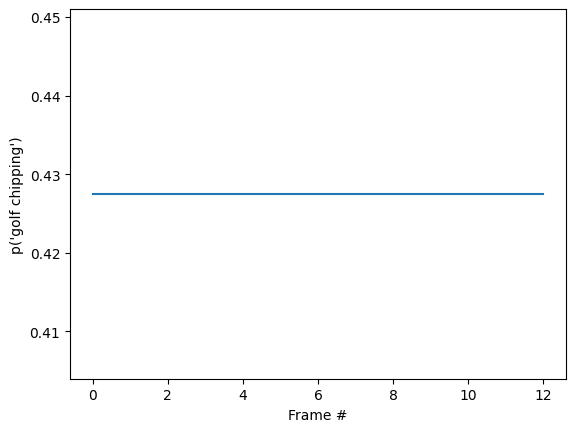

In [26]:
id = tf.argmax(probabilities[-1])
plt.plot(probabilities[:, id])
plt.xlabel('Frame #')
plt.ylabel(f"p('{KINETICS_600_LABELS[id]}')");

您可能会注意到，最终概率比上一部分中运行 `base` 模型的确定性要高得多。`base` 模型返回帧上预测的平均值。

In [27]:
for label, p in get_top_k(tf.reduce_mean(probabilities, axis=0)):
  print(f'{label:20s}: {p:.3f}')

golf chipping       : 0.427
tackling            : 0.134
lunge               : 0.056
stretching arm      : 0.053
passing american football (not in game): 0.039


## 让预测变成随时间变化的动画

上一部分详细介绍了如何使用这些模型。本部分在此基础上生成一些不错的推断动画。 

下面的隐藏单元定义了本部分中使用的辅助函数。

In [28]:
#@title
# Get top_k labels and probabilities predicted using MoViNets streaming model
def get_top_k_streaming_labels(probs, k=5, label_map=KINETICS_600_LABELS):
  """Returns the top-k labels over an entire video sequence.

  Args:
    probs: probability tensor of shape (num_frames, num_classes) that represents
      the probability of each class on each frame.
    k: the number of top predictions to select.
    label_map: a list of labels to map logit indices to label strings.

  Returns:
    a tuple of the top-k probabilities, labels, and logit indices
  """
  top_categories_last = tf.argsort(probs, -1, 'DESCENDING')[-1, :1]
  # Sort predictions to find top_k
  categories = tf.argsort(probs, -1, 'DESCENDING')[:, :k]
  categories = tf.reshape(categories, [-1])

  counts = sorted([
      (i.numpy(), tf.reduce_sum(tf.cast(categories == i, tf.int32)).numpy())
      for i in tf.unique(categories)[0]
  ], key=lambda x: x[1], reverse=True)

  top_probs_idx = tf.constant([i for i, _ in counts[:k]])
  top_probs_idx = tf.concat([top_categories_last, top_probs_idx], 0)
  # find unique indices of categories
  top_probs_idx = tf.unique(top_probs_idx)[0][:k+1]
  # top_k probabilities of the predictions
  top_probs = tf.gather(probs, top_probs_idx, axis=-1)
  top_probs = tf.transpose(top_probs, perm=(1, 0))
  # collect the labels of top_k predictions
  top_labels = tf.gather(label_map, top_probs_idx, axis=0)
  # decode the top_k labels
  top_labels = [label.decode('utf8') for label in top_labels.numpy()]

  return top_probs, top_labels, top_probs_idx

# Plot top_k predictions at a given time step
def plot_streaming_top_preds_at_step(
    top_probs,
    top_labels,
    step=None,
    image=None,
    legend_loc='lower left',
    duration_seconds=10,
    figure_height=500,
    playhead_scale=0.8,
    grid_alpha=0.3):
  """Generates a plot of the top video model predictions at a given time step.

  Args:
    top_probs: a tensor of shape (k, num_frames) representing the top-k
      probabilities over all frames.
    top_labels: a list of length k that represents the top-k label strings.
    step: the current time step in the range [0, num_frames].
    image: the image frame to display at the current time step.
    legend_loc: the placement location of the legend.
    duration_seconds: the total duration of the video.
    figure_height: the output figure height.
    playhead_scale: scale value for the playhead.
    grid_alpha: alpha value for the gridlines.

  Returns:
    A tuple of the output numpy image, figure, and axes.
  """
  # find number of top_k labels and frames in the video
  num_labels, num_frames = top_probs.shape
  if step is None:
    step = num_frames
  # Visualize frames and top_k probabilities of streaming video
  fig = plt.figure(figsize=(6.5, 7), dpi=300)
  gs = mpl.gridspec.GridSpec(8, 1)
  ax2 = plt.subplot(gs[:-3, :])
  ax = plt.subplot(gs[-3:, :])
  # display the frame
  if image is not None:
    ax2.imshow(image, interpolation='nearest')
    ax2.axis('off')
  # x-axis (frame number)
  preview_line_x = tf.linspace(0., duration_seconds, num_frames)
  # y-axis (top_k probabilities)
  preview_line_y = top_probs

  line_x = preview_line_x[:step+1]
  line_y = preview_line_y[:, :step+1]

  for i in range(num_labels):
    ax.plot(preview_line_x, preview_line_y[i], label=None, linewidth='1.5',
            linestyle=':', color='gray')
    ax.plot(line_x, line_y[i], label=top_labels[i], linewidth='2.0')


  ax.grid(which='major', linestyle=':', linewidth='1.0', alpha=grid_alpha)
  ax.grid(which='minor', linestyle=':', linewidth='0.5', alpha=grid_alpha)

  min_height = tf.reduce_min(top_probs) * playhead_scale
  max_height = tf.reduce_max(top_probs)
  ax.vlines(preview_line_x[step], min_height, max_height, colors='red')
  ax.scatter(preview_line_x[step], max_height, color='red')

  ax.legend(loc=legend_loc)

  plt.xlim(0, duration_seconds)
  plt.ylabel('Probability')
  plt.xlabel('Time (s)')
  plt.yscale('log')

  fig.tight_layout()
  fig.canvas.draw()

  data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  plt.close()

  figure_width = int(figure_height * data.shape[1] / data.shape[0])
  image = PIL.Image.fromarray(data).resize([figure_width, figure_height])
  image = np.array(image)

  return image

# Plotting top_k predictions from MoViNets streaming model
def plot_streaming_top_preds(
    probs,
    video,
    top_k=5,
    video_fps=25.,
    figure_height=500,
    use_progbar=True):
  """Generates a video plot of the top video model predictions.

  Args:
    probs: probability tensor of shape (num_frames, num_classes) that represents
      the probability of each class on each frame.
    video: the video to display in the plot.
    top_k: the number of top predictions to select.
    video_fps: the input video fps.
    figure_fps: the output video fps.
    figure_height: the height of the output video.
    use_progbar: display a progress bar.

  Returns:
    A numpy array representing the output video.
  """
  # select number of frames per second
  video_fps = 8.
  # select height of the image
  figure_height = 500
  # number of time steps of the given video
  steps = video.shape[0]
  # estimate duration of the video (in seconds)
  duration = steps / video_fps
  # estiamte top_k probabilities and corresponding labels
  top_probs, top_labels, _ = get_top_k_streaming_labels(probs, k=top_k)

  images = []
  step_generator = tqdm.trange(steps) if use_progbar else range(steps)
  for i in step_generator:
    image = plot_streaming_top_preds_at_step(
        top_probs=top_probs,
        top_labels=top_labels,
        step=i,
        image=video[i],
        duration_seconds=duration,
        figure_height=figure_height,
    )
    images.append(image)

  return np.array(images)

首先，在视频的帧上运行流式模型，然后收集 logit：

In [29]:
init_states = model.init_states(jumpingjack[tf.newaxis].shape)

In [30]:
# Insert your video clip here
video = jumpingjack
images = tf.split(video[tf.newaxis], video.shape[0], axis=1)

all_logits = []

# To run on a video, pass in one frame at a time
states = init_states
for image in tqdm.tqdm(images):
  # predictions for each frame
  logits, states = model({**states, 'image': image})
  all_logits.append(logits)

# concatinating all the logits
logits = tf.concat(all_logits, 0)
# estimating probabilities
probs = tf.nn.softmax(logits, axis=-1)

  0%|          | 0/13 [00:00<?, ?it/s]

 23%|██▎       | 3/13 [00:00<00:00, 26.58it/s]

 46%|████▌     | 6/13 [00:00<00:00, 26.98it/s]

 69%|██████▉   | 9/13 [00:00<00:00, 27.49it/s]

 92%|█████████▏| 12/13 [00:00<00:00, 27.78it/s]

100%|██████████| 13/13 [00:00<00:00, 27.49it/s]

In [31]:
final_probs = probs[-1]
print('Top_k predictions and their probablities\n')
for label, p in get_top_k(final_probs):
  print(f'{label:20s}: {p:.3f}')

Top_k predictions and their probablities

jumping jacks       : 0.999
zumba               : 0.000
doing aerobics      : 0.000
dancing charleston  : 0.000
slacklining         : 0.000


将概率序列转换为视频：

In [32]:
# Generate a plot and output to a video tensor
plot_video = plot_streaming_top_preds(probs, video, video_fps=8.)

  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [00:00<00:06,  1.85it/s]

 15%|█▌        | 2/13 [00:01<00:05,  1.96it/s]

 23%|██▎       | 3/13 [00:01<00:04,  2.02it/s]

 31%|███       | 4/13 [00:02<00:04,  2.02it/s]

 38%|███▊      | 5/13 [00:02<00:03,  2.02it/s]

 46%|████▌     | 6/13 [00:02<00:03,  2.01it/s]

 54%|█████▍    | 7/13 [00:03<00:02,  2.01it/s]

 62%|██████▏   | 8/13 [00:05<00:04,  1.17it/s]

 69%|██████▉   | 9/13 [00:05<00:02,  1.35it/s]

 77%|███████▋  | 10/13 [00:06<00:01,  1.51it/s]

 85%|████████▍ | 11/13 [00:06<00:01,  1.64it/s]

 92%|█████████▏| 12/13 [00:07<00:00,  1.74it/s]

100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

100%|██████████| 13/13 [00:07<00:00,  1.72it/s]

In [33]:
# For gif format, set codec='gif'
media.show_video(plot_video, fps=3)

## 资源

预训练模型可从 [TF Hub](https://tfhub.dev/google/collections/movinet/1) 获得。TF Hub 集合还包括为 [TFLite](https://tensorflow.org/lite) 优化的量化模型。

这些模型的源代码可在 [TensorFlow Model Garden](https://github.com/tensorflow/models/tree/master/official/projects/movinet) 中找到。包括[本教程的较长版本](https://colab.sandbox.google.com/github/tensorflow/models/blob/master/official/projects/movinet/movinet_tutorial.ipynb)，较长版本还介绍了如何构建和微调 MoViNet 模型。 